
# Study of a BTC strategy combining DCA with the Fear and Greed index

## Analysis of an investment strategy for the purchase of bitcoin where the DCA (Dollar Cost Average) and the market sentiment, Fear and Greed index, are combined.
 
The strategy will consist of the moment that would correspond to the periodic purchase (DCA) the Fear and Greed (F&G) metric will be evaluated
and if it has a value greater than 50, which is equivalent to a positive market sentiment
At the end, a comparison will be made of this combined strategy against a standard DCA during the period that data from the Fear and Greed index are available, Which is from February 2018 to the present.

Dollar Cost Averaging (DCA) is a type of strategy that consists of investing the same amount of money every so often
It is independent of what happens in the market since you will invest the same, even if the price of BTC goes up or down.
This reduces the impact that an entry into the market at the wrong time may have and minimizes the consequences of the high volatility of BTC.
Initially it is intended to buy and hold (hodl) but it is not mandatory
It is a practically neglected option. You invest an amount of money at a certain time and leave it there for a while with the idea that bitcoin will tend to rise in the long term
It does not require a large initial investment and allows you to plan your risk.

The Fear and Greed Index is a metric published by https://alternative.me/crypto/fear-and-greed-index/ that attempts to predict market sentiment based on these 5 indicators:
Volatility (25%)
Market Volume / Momentum (25%)
Social Networks (15%)
Dominance (10%)
Trends (10%)


**Disclaimer:** 
This article is not investment advice, act according to your own criteria.


This notebook in Python serves as code support for the post 'Study of a BTC strategy combining DCA with the Fear and Greed' https://bgeometrics.com/2022/11/09/study-of-a-btc-strategy-combining-dca-with -the-fear-and-greed/


In [1]:
# The necessary library is imported to download the BTC price data from the Yahoo Finance website.
!pip install yfinance > /dev/null

The Python libraries that will be used in the study are the following.

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf
from pylab import rcParams
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 10, 5

Download Bitcoin price data from Yahoo Finance.

In [3]:
df = yf.download('BTC-USD', interval = '1d')[['Close']]
df.rename(columns = {'Close':'close'}, inplace=True)
df.index.name = 'timestamp'
df['timestamp'] = df.index
df.reset_index(drop=True, inplace=True)
df.timestamp = pd.to_datetime(df.timestamp, unit='s').dt.tz_localize(None)
df.set_index(df.timestamp, inplace=True)
df.drop(['timestamp'], axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed


Download F&G data from https://alternative.me/crypto/fear-and-greed-index/

In [4]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

# Show fear and greed index from February 2018.
# Values range from 0 to 100, with low values indicating fear and high values indicating euphoria.
df1 = pd.DataFrame(r.json()['data'])
df1.value = df1.value.astype(int)
df1.timestamp = pd.to_datetime(df1.timestamp, unit='s')
df1.set_index(df1.timestamp, inplace=True)
df1.rename(columns = {'value':'fear_greed', 'timestamp':'date'}, inplace=True)
df1.drop(['time_until_update'], axis=1, inplace=True)

Fear and Greed Index Data Joins Bitcoin Dollar Price Data.

In [5]:
data = df.merge(df1, on='timestamp')
data = data.sort_index()
data.tail()

,close,fear_greed,value_classification,date
timestamp,,,,
2022-11-07,20602.816406,33,Fear,2022-11-07
2022-11-08,18541.271484,31,Fear,2022-11-08
2022-11-09,15880.780273,29,Fear,2022-11-09
2022-11-10,17586.771484,22,Extreme Fear,2022-11-10
2022-11-11,17312.101562,25,Extreme Fear,2022-11-11


BTC price chart colored based on market sentiment as marked by the Fear and Greed index.
The bluer colors correspond to the feeling of fear and the more yellowish to euphoria.
It can be seen in the graph that yellowish colors predominate in periods of price increase and in periods of decrease, blue and violet are the most recurrent colors.

In [6]:
fig = px.scatter(data, x="date", y="close", color="fear_greed",
                 title="BTC price with fear and greed index in continuous color")
fig.update_layout({
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.show()

A DCA strategy is implemented where BTC is bought once a week and only when the F&G is greater than 50.

In [7]:
limit_fear_greed = 50
buy_dates = pd.date_range(data.index[0], data.index[-1], freq='1W')
data_buy = data[(data.index.isin(buy_dates) & (data.fear_greed > limit_fear_greed))]

# The amount of dollars available weekly to buy is $100.
buy_dca = 100
data_buy['btc_amt'] = buy_dca / data_buy.close
data_buy['btc_amt_sum'] = data_buy.btc_amt.cumsum()
data_buy

,close,fear_greed,value_classification,date,btc_amt,btc_amt_sum
timestamp,,,,,,
2018-02-18,10551.799805,63,Greed,2018-02-18,0.009477,0.009477
2018-04-29,9419.080078,61,Greed,2018-04-29,0.010617,0.020094
2018-05-06,9654.799805,67,Greed,2018-05-06,0.010358,0.030451
2018-07-29,8218.459961,54,Neutral,2018-07-29,0.012168,0.042619
2018-11-11,6411.270020,54,Neutral,2018-11-11,0.015598,0.058217
...,...,...,...,...,...,...
2021-10-17,61553.617188,79,Extreme Greed,2021-10-17,0.001625,0.621462
2021-10-24,60930.835938,73,Greed,2021-10-24,0.001641,0.623103
2021-10-31,61318.957031,74,Greed,2021-10-31,0.001631,0.624734


The period for which F&G index data is available is from February 1, 2018 to the present.

In [8]:
print(data_buy.index[0])
print(data_buy.index[-1])

2018-02-18 00:00:00
2021-11-14 00:00:00


Calculation of the expenses and benefits of the mixed strategy (DCA and F&G) without taking into account the commissions for the purchase of BTC.

In [9]:
spent = buy_dca * len(data_buy)
amount = data_buy.iloc[-1].btc_amt_sum * data.iloc[-1].close
print("Nº of purchases: \t " + str(len(data_buy)))
print("Spent: \t\t\t $" + str(spent))
print("Gross profit: \t\t $" + str(amount))
print("Net profit: \t\t $" + str(amount - spent))

Nº of purchases: 	 81
Spent: 			 $8100
Gross profit: 		 $10869.236664117092
Net profit: 		 $2769.236664117092


Weekly chart of the price of bitcoin when the Fear and Greed index is greater than 50.
The circles that appear in the graph indicate the moments of purchase according to this strategy. 
There are 3 areas of accumulation of them that coincide with the bullish periods of the price.
*   A first area from February to August of the year 2019 where the rise is moderate and the euphoria is less.
*   A second from August 2020 to May 2021 where one of the great bitcoin bull runs occurs and the euphoria is maximum, reaching values of 95 points.
*   And a last one from August 2021 to November 2021 where the euphoria is less but where the ATH (the highest value of all time) is reached on November 9, 2021, since then the fear and greed index has not exceeded the 50 for which no purchase order would have been executed.



In [10]:
fig = px.scatter(data_buy, x="date", y="close", color="fear_greed",
                 title="BTC weekly price with fear and greed index only when F&G > 50")
fig.update_layout({
    "plot_bgcolor": "rgba(0, 0, 0, 0)",
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.show()

Calculation of the performance of a pure DCA strategy where BTC is bought every week.

In [11]:
buy_dates = pd.date_range(data.index[0], data.index[-1], freq='1W')
data_buy_dca_week = data[(data.index.isin(buy_dates))]

# The weekly purchase is calculated in dollars so that the value spent during the period is similar in both cases. 
buy_dca_week = buy_dca * len(data_buy) / len(data_buy_dca_week)
data_buy_dca_week['btc_amt'] = buy_dca_week / data_buy_dca_week.close
data_buy_dca_week['btc_amt_sum'] = data_buy_dca_week.btc_amt.cumsum()
buy_dca_week

32.66129032258065

When calculating the benefits of the DCA strategy, the commissions for the purchase of bitcoin are not taken into account either.

In [12]:
spent_dca_week = buy_dca_week * len(data_buy_dca_week)
amount_dca_week = data_buy_dca_week.iloc[-1].btc_amt_sum * data.iloc[-1].close

print("Nº of purchases: \t " + str(len(data_buy_dca_week)))
print("Spent: \t\t\t $" + str(spent_dca_week))
print("Gross profit: \t\t $" + str(amount_dca_week))
print("Net profit: \t\t $" + str(amount_dca_week - spent_dca_week))

Nº of purchases: 	 248
Spent: 			 $8100.000000000001
Gross profit: 		 $13271.494290799703
Net profit: 		 $5171.494290799702


Comparative graph showing how the BTC acquired in the mixed strategy of DCA and F&G are accumulated.
In the case of the DCA and F&G line, no data has appeared since November 2021 because since then the Fear and Greed index has not exceeded 50 points.

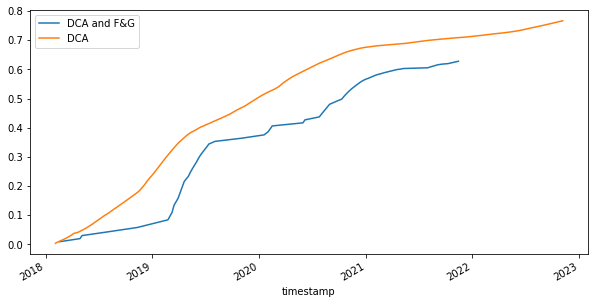

In [13]:
data_buy['btc_amt_sum'].plot(label='DCA and F&G')
data_buy_dca_week['btc_amt_sum'].plot(label='DCA')
plt.legend()
plt.show()

Comparison in numbers of the two investment strategies.

In [14]:
print("#####\t DCA and F&G Strategy \t#####")
print("Spent: \t\t\t $" + str(spent))
print("Net profit: \t\t $" + str(amount - spent))
print("Accumulated BTC: \t " + str(data_buy.iloc[-1].btc_amt_sum))
print("\n#####\t DCA Strategy \t\t#####")
print("Spent: \t\t\t $" + str(spent_dca_week))
print("Net profit: \t\t $" + str(amount_dca_week - spent_dca_week))
print("Accumulated BTC: \t " + str(data_buy_dca_week.iloc[-1].btc_amt_sum))

#####	 DCA and F&G Strategy 	#####
Spent: 			 $8100
Net profit: 		 $2769.236664117092
Accumulated BTC: 	 0.627840393893085

#####	 DCA Strategy 		#####
Spent: 			 $8100.000000000001
Net profit: 		 $5171.494290799702
Accumulated BTC: 	 0.7666021506913571


In view of the numbers, the mixed investment strategy in DCA bitcoin and the Fear and Greed index in the period studied is worse than a recurring purchase strategy of the same amount of money.
In this period we would have an expense of 8100 dollars and 0.62 BTC in our account, in the case of the combined strategy that is equivalent to 4527 dollars discounting the purchase expenses and we would have 0.76 BTC if we had opted for a DCA that at today's price minus the expenses It's about $7,300.
